# Sampling of Signals

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Ideal Sampling and Reconstruction

[Digital signal processors](https://en.wikipedia.org/wiki/Digital_signal_processor) and general purpose processors can only perform arithmetic operations within a limited number range. So far we considered continuous signals which are continuous with respect to time and its amplitude values. Such signals cannot be handled by processors in a straightforward manner. In order to obtain a digital representation of a continuous signal, a discretization has to be perfomed in both time and amplitude. The former is known as [*sampling*](https://en.wikipedia.org/wiki/Sampling_%28signal_processing%29), the latter as [*quantization*](https://en.wikipedia.org/wiki/Quantization_%28signal_processing%29). Sampling refers to the process of picking amplitude values from a continuous signal at discrete time-instants. The sampled signal is referred to as *discrete signal*. Quantization refers to the process of mapping a continuous amplitude to a countable set of amplitude values. The quantized signal is referred to as *quantized signal*. A signal which is discrete and quantized is a *digital signal*. This is illustrated in the following

![Sampling and quantization of signals](analog_discrete_digital.png)

Only digital signals can be handled by digital signal or general purpose processors. The sampling of signals is discussed in the following.

### Model of Ideal Sampling

A continuous signal $x(t)$ is sampled by taking its amplitude values at given time-instants. These time-instants can be chosen arbitrary in time, but most common are equidistant sampling schemes. The process of sampling is modeled by multiplying the continuous signal with a series of Dirac impulses. This constitutes an idealized model since Dirac impulses cannot be realized in practice.

For equidistant sampling of a continuous signal $x(t)$ with sampling interval $T$, the sampled signal $x_\text{s}(t)$ reads

\begin{equation}
x_\text{s}(t) = \sum_{k = - \infty}^{\infty} x(t) \cdot \delta(t - k T) = \sum_{k = - \infty}^{\infty} x(k T) \cdot \delta(t - k T)
\end{equation}

where the [multiplication property](../continuous_signals/standard_signals.ipynb#Dirac-Impulse) of the Dirac impulse was used for the last equality. The sampled signal is composed from a series of equidistant Dirac impulse which are weighted by the amplitude values of the continuous signal. 

![Ideal sampling of signals](ideal_sampling.png)

The series of Dirac impulse is represented conveniently by the [Dirac comb](../periodic_signals/spectrum.ipynb#The-Dirac-Comb). Rewriting the sampled signal yields

\begin{equation}
x_\text{s}(t) = x(t) \cdot \frac{1}{T} {\bot \!\! \bot \!\! \bot} \left( \frac{t}{T} \right)
\end{equation}

The process of sampling can be modeled by multipyling the continuous signal $x(t)$ with a Dirac comb. The samples $x(k T)$ for $k \in \mathbb{Z}$ of the continuous signal constitute the [discrete (-time) signal](https://en.wikipedia.org/wiki/Discrete-time_signal) $x[k] := x(k T)$. The question arises if and under which conditions the samples $x[k]$ fully represent the continuous signal and allow for a reconstruction. In order to investigate this, the spectrum of the sampled signal is derived in the following.

### Spectrum of Sampled Signal

The spectrum $X_\text{s}(j \omega) = \mathcal{F} \{ x_\text{s}(t) \}$ of the sampled signal $x_\text{s}(t)$ is derived by applying the [multiplication theorem](../fourier_transform/theorems.ipynb#Multiplication-Theorem) to above representation of the sampled signal by the Dirac comb

\begin{align}
X_\text{s}(j \omega) &= \frac{1}{2 \pi} X(j \omega) * {\bot \!\! \bot \!\! \bot} \left( \frac{\omega}{\omega_\text{s}} \right) \\
&= \frac{1}{2 \pi} X(j \omega) * \frac{2 \pi}{T} \sum_{\mu = - \infty}^{\infty} \delta(\omega - \mu \omega_\text{s}) \\
&= \frac{1}{T} \sum_{\mu = - \infty}^{\infty} X \left(j (\omega - \mu \omega_\text{s}) \right)
\end{align}

where $X(j \omega) = \mathcal{F} \{ x(t) \}$ denotes the Fourier transform of the continuous signal, $\omega_\text{s} = 2 \pi \, f_\text{s}$ the angluar sampling frequency and $f_\text{s} = \frac{1}{T}$ the sampling frequency. The second equality results from the definition of the Dirac comb and the scaling property of the Dirac impulse, the third from its sifting property. The spectrum of the sampled signal consists of a superposition of shifted copies of the spectrum of the continuous signal. The resulting spectrum is periodic with a period of $\omega_\text{s}$. It can be concluded, that equidistant sampling results in a repetition of the spectrum of the continuous signal.

The spectrum $X_\text{s}(j \omega)$ of a sampled signal is illustrated at the example of a real-valued low-pass signal. A low-pass signal $x(t)$ is a signal with band-limited spectrum

\begin{equation}
X(j \omega) = 0 \qquad \text{for } |\omega| > \omega_\text{u}
\end{equation}

where $\omega_\text{u}$ denotes its upper frequency limit. The following illustration shows the generic spectrum of a continuous real-valued low-pass signal

![Spectrum of continuous low-pass signal](spectrum_lowpass_signal.png)

The spectrum of the sampled signal is constructed by superimposing shifted copies of the spectrum of the continuous low-pass signal $X(j \omega)$ at multiples of $\omega_\text{s}$

![Spectrum of sampled low-pass signal](spectrum_sampled_signal.png)

It can be concluded from the illustration, that the shifted copies of $X(j \omega)$ do not overlap if $\omega_\text{u} < \frac{\omega_\text{s}}{2}$. For $|\omega| < \omega_\text{u}$ the spectrum of the continuous signal is not affected by overlapping in this case. However, for $\omega_\text{u} > \frac{\omega_\text{s}}{2}$ overlapping occurs which changes the spectrum of the continuous signal within $|\omega| < \omega_\text{u}$.

### Ideal Reconstruction

The question arises if and under which conditions the continuous signal can be recovered from the sampled signal. Above consideration revealed that the spectrum $X_\text{s}(j \omega)$ of the sampled signal contains the unaltered spectrum of the continuous signal $X(j \omega)$ if $\omega_\text{u} < \frac{\omega_\text{s}}{2}$. Hence, the continuous signal can be reconstructed from the sampled signal by extracting the spectrum of the continuous signal from the spectrum of the sampled signal. This can be done by applying an [ideal low-pass](../system_properties/idealized_systems.ipynb#Ideal-Low-Pass) with cut-off frequency $\omega_\text{c} = \frac{\omega_{s}}{2}$. This is illustrated in the following

![Ideal reconstruction of a sampled low-pass signal](ideal_reconstruction.png)

where the blue line represents the spectrum of the sampled signal and the red line the spectrum of the ideal low-pass. The transfer function $H(j \omega)$ of the low-pass reads

\begin{equation}
H(j \omega) = T \cdot \text{rect} \left( \frac{\omega}{\omega_\text{s}} \right)
\end{equation}

Its impulse response $h(t)$ is yielded by inverse Fourier transform of the transfer function

\begin{equation}
h(t) = \text{sinc} \left( \frac{\pi t}{T} \right)
\end{equation}

The reconstructed signal $y(t)$ is given by convolving the sampled signal $x_\text{s}(t)$ with the impulse response of the low-pass filter. This results in

\begin{align}
y(t) &= x_\text{s}(t) * h(t) \\
&= \left( \sum_{k = - \infty}^{\infty} x(k T) \cdot \delta(t - k T) \right) * \text{sinc} \left( \frac{\pi t}{T} \right) \\
&= \sum_{k = - \infty}^{\infty} x(k T) \cdot \text{sinc} \left( \frac{\pi}{T} (t - k T) \right)
\end{align}

where for the last equality the fact was exploited that $x(k T)$ is independent of the time $t$ for which the convolution is performed. The reconstructed signal is given by a weighted superposition of shifted sinc functions. Their weights are given by the samples $x(k T)$ of the continuous signal. The reconstruction is illustrated in the following figure

![Interpolation of sampled signal by sinc function](sinc_interpolation.png)

The black boxes show the samples $x(k T)$ of the continuous signal, the blue line the reconstructed signal $y(t)$, the gray lines the weighted sinc functions. The sinc function for $k = 0$ is highlighted in red. The amplitudes $x(k T)$ at the sampled positions are reconstructed perfectly since 

\begin{equation}
\text{sinc} ( \frac{\pi}{T} (t - k T) ) = \begin{cases}
\text{sinc}(0) = 1 & \text{for } t=k T \\
\text{sinc}(n \pi) = 0 & \text{for } t=(k+n) T \quad , n \in \mathbb{Z} \notin \{0\} 
\end{cases}
\end{equation}

The amplitude values in between the sampling positions $t = k T$ are given by superimposing the shifted sinc functions. The process of computing values in between given sampling points is termed [*interpolation*](https://en.wikipedia.org/wiki/Interpolation). The reconstruction of the sampled signal is performed by interpolating the discrete amplitude values $x(k T)$. The sinc function is the optimal interpolator in this context.

### Aliasing

So far the case was considered when no overlaps occur in the spectrum of the sampled signal. This is the case when the upper frequency limit $\omega_\text{u}$ of the real-valued low-pass signal is lower than $\frac{\omega_\text{s}}{2}$. Here a perfect reconstruction of the continuous signal $x(t)$ from its discrete counterpart $x[k]$ is possible. However when this condition is not fulfilled, the repetitions of the spectrum of the continuous signal overlap. This is illustrated in the following

![Aliasing](aliasing.png)

In this case no perfect reconstruction of the continuous signal by low-pass filtering (interpolation) of the sampled signal is possible. The spectrum within the pass-band of the low-pass contains additional contributions from the repeated spectrum of the continuous signal. These contributions are known as [aliasing](https://en.wikipedia.org/wiki/Aliasing). It becomes evident from above discussion of ideal reconstruction that the amplitude values are reconstructed correctly at the time-instants $k T$. However, in between these time-instants the reconstructed signal $y(t)$ differs from the sampled signal $x(t)$ if aliasing is present.

### Sampling Theorem for Low-Pass Signals

It can be concluded from above discussion of sampling, that a sufficient condition for the perfect reconstruction of a real-valued low-pass signal $x(t)$ is given as

\begin{equation}
\omega_\text{s} \geq 2 \cdot \omega_\text{c}
\end{equation}

The minimum sampling frequency has to be chosen as double the highest frequency present in the continuous signal. This condition is known as [*Nyquist–Shannon sampling theorem*](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem). Only if this condition is fulfilled, all information contained in a low-pass signal $x(t)$ is represented by its samples $x[k] = x(k T)$.

Depending on the relation between the sampling frequency $\omega_\text{s}$ and the upper frequency limit $\omega_\text{u}$ of the low-pass signal, three different cases can be distinguished

* oversampling $\omega_\text{s} > 2 \cdot \omega_\text{c}$
* critical sampling $\omega_\text{s} = 2 \cdot \omega_\text{c}$
* undersampling $\omega_\text{s} < 2 \cdot \omega_\text{c}$

In practical applications sampling is always oversampled to some degree since the ideal low-pass used to reconstruct the continuous signal cannot be realized. Examples for sampling rates in audio are

| | sampling frequency $f_\text{s}$ |
|:---|:---:|
| Telephone service | Narrowband: 8 kHz, Wideband: 16 kHz |
| [Compact Disc (CD)](https://en.wikipedia.org/wiki/Compact_disc) | [44.1 kHz](https://en.wikipedia.org/wiki/44,100_Hz) |
| [DVD-Audio](https://en.wikipedia.org/wiki/DVD-Audio) | 44.1, 48, 88.2, 96, 176.4, 192 kHz |

### Ideal Sampling and Reconstruction of a Cosine Signal

The ideal sampling and reconstruction of a signal $x(t)$ is illustrated in the following. Two functions are defined which ideally sample the signal $x(t)$ at equidistant time-instants $t = k T$ and compute the reconstructed signal $y(t)$ from the samples by an ideal low-pass.

In [1]:
%matplotlib inline

import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
sym.init_printing()

t = sym.symbols('t', real=True)
k = sym.symbols('k', integer=True)

# faster than sympy.sinc
def sinc(x):
    return sym.sin(x)/x

def ideal_sampling(x, k, w_s):
    kappa = sym.symbols('kappa')
    xs = sym.lambdify(kappa, x.subs(t, kappa * 2 * sym.pi / w_s))
    return [xs(kappa) for kappa in k]

def ideal_reconstruction(xs, k, w_s):
    T = 2*sym.pi/w_s
    return sum(xs[n] * sinc(sym.pi / T * (t - k[n] * T)) for n in range(len(k)))

Furthermore a helper function for plotting of the sampled and reconstructed signal is defined.

In [2]:
def plot_signals(xs, y, w_s, k):
    
    plt.stem(k*2*np.pi/w_s, xs)
    plt.xlabel('$t$ in s')
    plt.ylabel('$x_s[k] = x_s(kT)$')
    plt.axis([0, 5, -1.2, 1.2])

    sym.plot(y, (t,0,5), xlabel='$t$', ylabel='$y(t)$', ylim=(-1.2, 1.2))

Now the continuous signal to be sampled and reconstructed is defined and plotted. For ease of illustration a cosine signal $x(t) = \cos(\omega_0 t)$ with $\omega_0 = 5$ is used in the following.

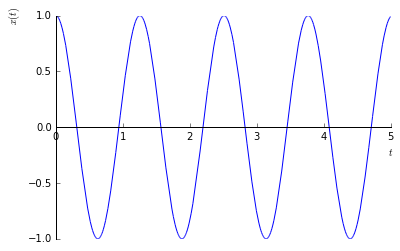

In [3]:
w_0 = 5
x = sym.cos(w_0 * t)

sym.plot(x, (t,0,5), xlabel=r'$t$', ylabel=r'$x(t)$');

First the case of oversampling $\omega_\text{s} > 2 \cdot \omega_0$ with $\omega_\text{s} = 50$ is illustrated

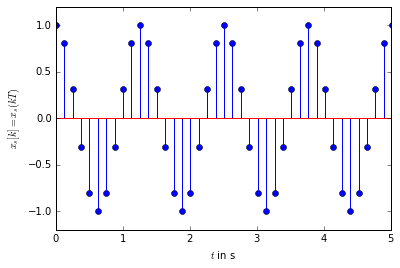

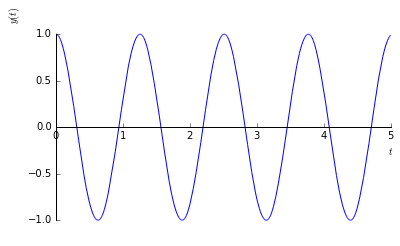

In [4]:
k = np.arange(-100, 100)

w_s = 50
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k)

Then the case of critical sampling $\omega_\text{s} = 2 \cdot \omega_0$ with $\omega_\text{s} = 10$ is illustrated

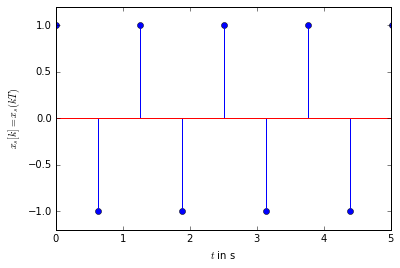

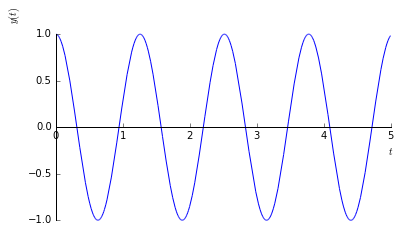

In [5]:
w_s = 10
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k)

Finally the case of undersampling $\omega_\text{s} < 2 \cdot \omega_0$ with $\omega_\text{s} = 7$ is illustrated

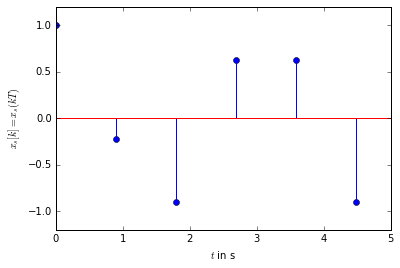

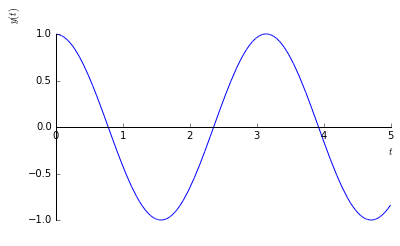

In [6]:
w_s = 7
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k)

**Exercise**

* Derive the spectrum of the reconstructed signal for the sampling of $x = \cos(\omega_0 t)$ with sampling frequency $\omega_s$ by computing 

    * the spectrum $X(j \omega)$ of the continuous signal
    * the spectrum $X_\text{s}(j \omega)$ of the sampled signal
    * the spectrum $Y(j \omega)$ of the reconstructed signal for the case of over-, critial- and undersampling
    * the reconstructed signal $y(t)$ for the case of over-, critial- and undersampling
    
* Reevaluate above example with $x(t) = \text{rect}(t - \frac{3}{2})$. 

    * Hint: Define the signal by `x = sym.Heaviside(t-1) - sym.Heaviside(t-2)`
    * Is a perfect reconstruction possible? If not, why?

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.